In [16]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

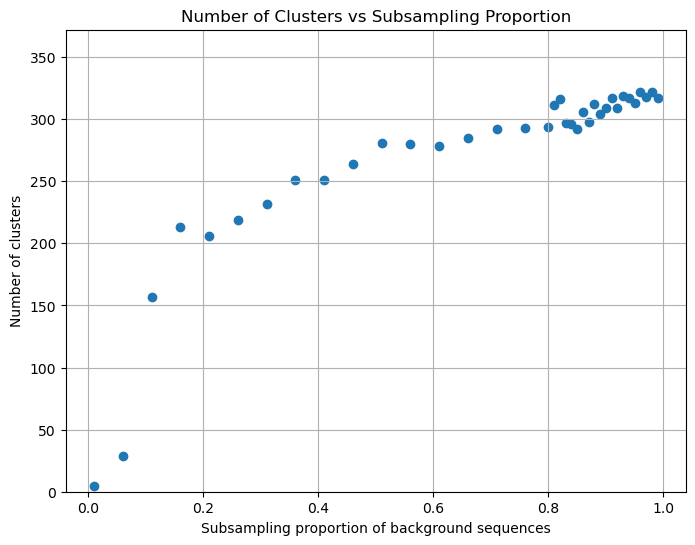

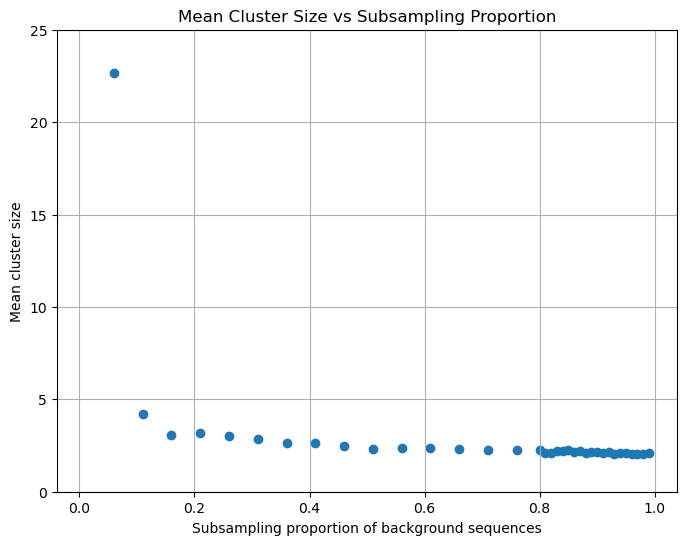

In [31]:
# path = "~/Desktop/gitrepos/mpox_la/mpox_build/cluster_assignment/"
# results_path = os.path.join(os.path.expanduser(path), "results")

# Get the list of files matching the pattern 'cluster_assignment*.tsv'
list_files = glob.glob(os.path.join("../mpox_build/cluster_assignment/results/", "cluster_assignment*.tsv"))

dat = pd.DataFrame()

# Loop through the files
for file in list_files:
    df = pd.read_csv(file, sep="\t")  # Read the file into a DataFrame
    
    tmp = os.path.basename(file).split("_")  # Split filename based on "_"
    val = tmp[-1].replace("assignment", "100").replace(".tsv", "")
    uni_clusters = df['cluster'].unique()  # Get unique clusters
    cluster_size = [sum(df['cluster'] == cluster) for cluster in uni_clusters]  # Get the size of each cluster
    
    dat = pd.concat([dat, pd.DataFrame({
        'sub': [float(val)/100],
        'nr': [len(uni_clusters)],
        'm': [np.mean(cluster_size)],
        'u': [np.quantile(cluster_size, 0.975)],
        'median': [np.median(cluster_size)]
    })], ignore_index=True)

# Plot number of clusters vs subsampling proportion
plt.figure(figsize=(8, 6))
plt.scatter(dat['sub'], dat['nr'])
plt.ylim(0, dat['nr'].max()+50)
plt.xlabel("Subsampling proportion of background sequences")
plt.ylabel("Number of clusters")
plt.title("Number of Clusters vs Subsampling Proportion")
plt.grid(True)
plt.savefig("../figures/subsampling_sens_outside_LA_cluster_number.png", dpi = 300)
plt.show()

# Plot mean cluster size vs subsampling proportion
plt.figure(figsize=(8, 6))
plt.scatter(dat['sub'], dat['m'])
plt.ylim(0, 25)
plt.xlabel("Subsampling proportion of background sequences")
plt.ylabel("Mean cluster size")
plt.title("Mean Cluster Size vs Subsampling Proportion")
plt.grid(True)
plt.savefig("../figures/subsampling_sens_outside_LA_cluster_size.png", dpi = 300)
plt.show()


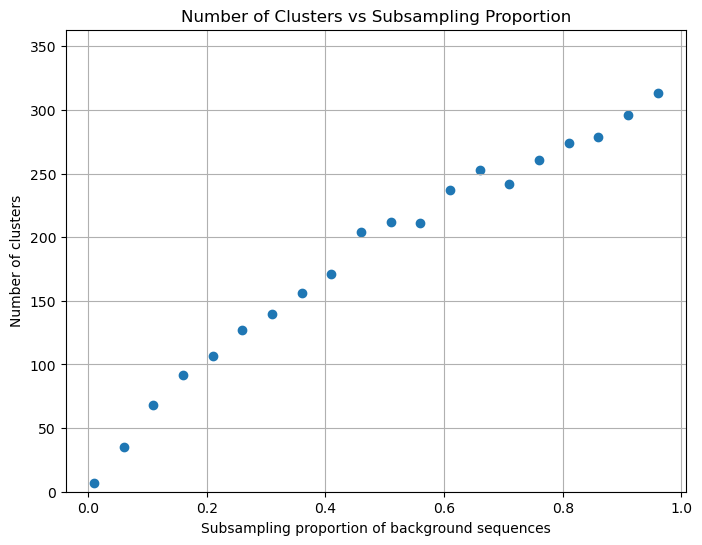

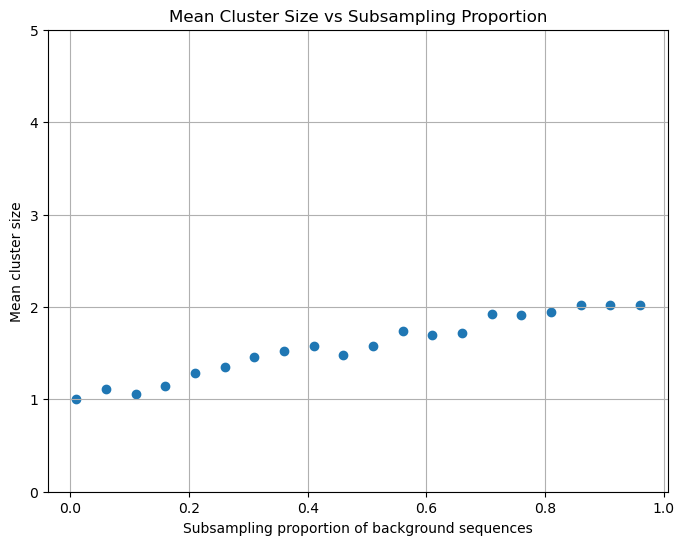

In [33]:
# path = "~/Desktop/gitrepos/mpox_la/mpox_build/cluster_assignment/"
# results_path = os.path.join(os.path.expanduser(path), "results")

# Get the list of files matching the pattern 'cluster_assignment*.tsv'
list_files = glob.glob(os.path.join("../mpox_build/cluster_assignment/results/inside/", "cluster_assignment_within*.tsv"))

dat = pd.DataFrame()

# Loop through the files
for file in list_files:
    df = pd.read_csv(file, sep="\t")  # Read the file into a DataFrame
    
    tmp = os.path.basename(file).split("_")  # Split filename based on "_"
    val = tmp[-1].replace("assignment_within_LA_subsampling", "100").replace(".tsv", "")
    uni_clusters = df['cluster'].unique()  # Get unique clusters
    cluster_size = [sum(df['cluster'] == cluster) for cluster in uni_clusters]  # Get the size of each cluster
    
    dat = pd.concat([dat, pd.DataFrame({
        'sub': [float(val)/100],
        'nr': [len(uni_clusters)],
        'm': [np.mean(cluster_size)],
        'u': [np.quantile(cluster_size, 0.975)],
        'median': [np.median(cluster_size)]
    })], ignore_index=True)

# Plot number of clusters vs subsampling proportion
plt.figure(figsize=(8, 6))
plt.scatter(dat['sub'], dat['nr'])
plt.ylim(0, dat['nr'].max()+50)
plt.xlabel("Subsampling proportion of background sequences")
plt.ylabel("Number of clusters")
plt.title("Number of Clusters vs Subsampling Proportion")
plt.grid(True)
plt.savefig("../figures/subsampling_sens_inside_LA_cluster_number.png", dpi = 300)
plt.show()

# Plot mean cluster size vs subsampling proportion
plt.figure(figsize=(8, 6))
plt.scatter(dat['sub'], dat['m'])
plt.ylim(0, 5)
plt.xlabel("Subsampling proportion of background sequences")
plt.ylabel("Mean cluster size")
plt.title("Mean Cluster Size vs Subsampling Proportion")
plt.grid(True)
plt.savefig("../figures/subsampling_sens_inside_LA_cluster_size.png", dpi = 300)
plt.show()
